In [1]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


# Importing Data 

In [3]:
ravdess = "C:/Users/vaibh/Desktop/Research ppr/ravdaas/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [4]:
Crema = "C:\\Users\\vaibh\\Desktop\\Research ppr\\crema\\AudioWAV\\"
Tess = "C:\\Users\\vaibh\\Desktop\\Research ppr\\tess\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\"
Savee = "C:\\Users\\vaibh\\Desktop\\Research ppr\\savee\\ALL\\"

# preprocessing

**Ravdees**

In [5]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)
    

**Crema DataFrame**

CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).

In [8]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())


disgust    1271
happy      1271
sad        1271
fear       1271
angry      1271
neutral    1087
Name: Emotions, dtype: int64


**TESS dataset**

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

In [9]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())


fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: Emotions, dtype: int64


**SAVEE Dataset**

Speakers: 4 male (DC, JE, JK, KL), aged 27–31, from the University of Surrey

Emotions (7): Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral

Sentences per Emotion: 15 (3 common, 2 emotion-specific, 10 generic)

Neutral Sentences: 30 (3 common + 12 emotion-specific)

Total Utterances per Speaker: 120

Example:

Anger: Who authorized the unlimited expense account?

Happiness: Those musicians harmonize marvelously.

Neutral: The best way to learn is to solve extra problems.

In [10]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())


neutral     120
happy        60
fear         60
disgust      60
angry        60
surprise     60
sad          60
Name: Emotions, dtype: int64


**Integration**

In [11]:
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

In [12]:
print(data_path.Emotions.value_counts())

disgust     1923
fear        1923
sad         1923
happy       1923
angry       1923
neutral     1895
surprise     652
Name: Emotions, dtype: int64


>*                           Data Visualisation and Exploration

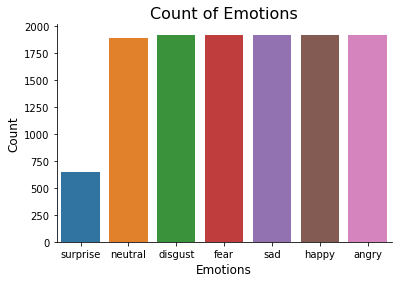

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [14]:
data,sr = librosa.load(file_path[0])
sr

22050

In [15]:
ipd.Audio(data,rate=sr)

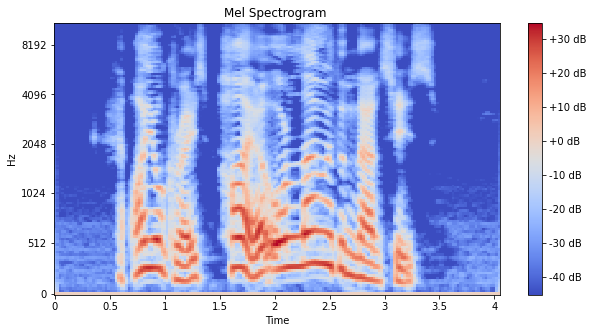

In [16]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

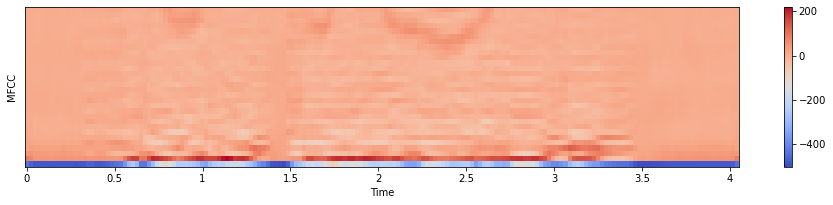

In [17]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [18]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

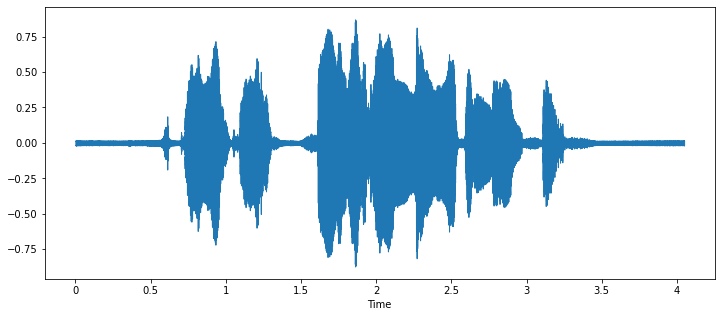

In [19]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

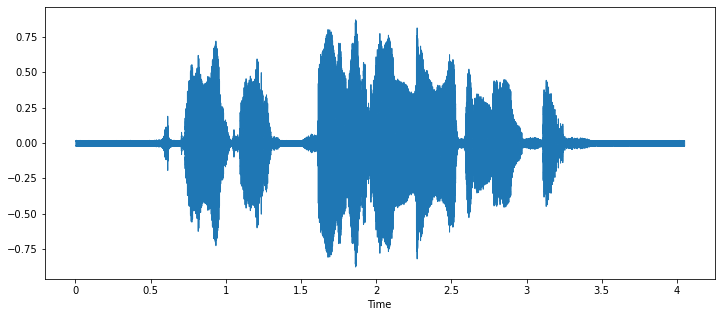

In [20]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

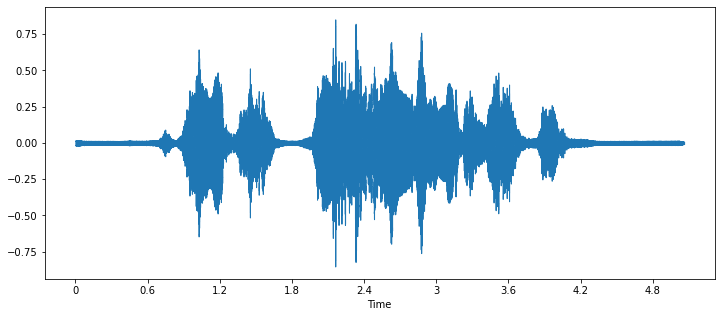

In [21]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

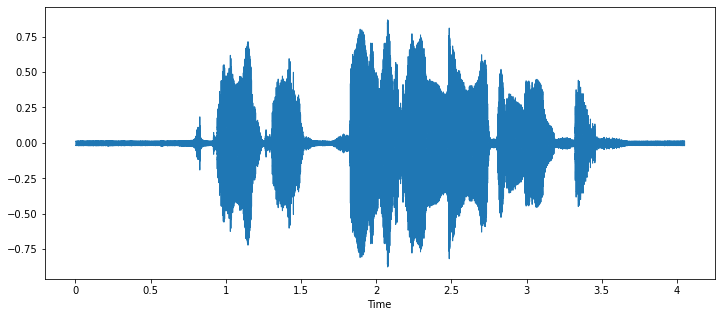

In [22]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

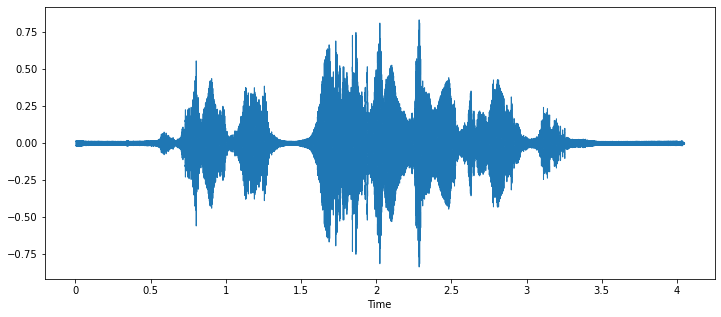

In [23]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# Feature extraction

In [24]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio


In [25]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


# Features Extraction

In [26]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)         

1it [00:00,  2.07it/s]

0 audio has been processed


501it [04:45,  1.77it/s]

500 audio has been processed


1001it [09:30,  1.80it/s]

1000 audio has been processed


1501it [14:06,  2.28it/s]

1500 audio has been processed


2001it [17:49,  2.32it/s]

2000 audio has been processed


2501it [21:35,  2.12it/s]

2500 audio has been processed


3001it [25:19,  2.26it/s]

3000 audio has been processed


3501it [29:05,  2.19it/s]

3500 audio has been processed


4001it [32:55,  2.25it/s]

4000 audio has been processed


4501it [36:41,  2.42it/s]

4500 audio has been processed


5001it [40:28,  2.25it/s]

5000 audio has been processed


5501it [44:17,  2.23it/s]

5500 audio has been processed


6001it [48:03,  2.06it/s]

6000 audio has been processed


6501it [51:51,  2.10it/s]

6500 audio has been processed


7001it [55:38,  2.24it/s]

7000 audio has been processed


7501it [59:24,  2.23it/s]

7500 audio has been processed


8001it [1:03:11,  2.32it/s]

8000 audio has been processed


8501it [1:06:56,  2.14it/s]

8500 audio has been processed


9001it [1:10:30,  2.98it/s]

9000 audio has been processed


9501it [1:13:16,  2.30it/s]

9500 audio has been processed


10001it [1:16:51,  2.25it/s]

10000 audio has been processed


10501it [1:20:49,  2.40it/s]

10500 audio has been processed


11001it [1:24:20,  2.25it/s]

11000 audio has been processed


11501it [1:27:52,  2.70it/s]

11500 audio has been processed


12001it [1:31:50,  1.99it/s]

12000 audio has been processed


12162it [1:33:14,  2.17it/s]

Done
Time:  5594.533975138


In [28]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

# Saving features

In [29]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

0         1         2         3         4         5         6  \
0  0.331543  0.471680  0.564941  0.452148  0.374512  0.296875  0.265137   
1  0.238770  0.361816  0.478516  0.473633  0.485352  0.476074  0.472656   
2  0.299805  0.419922  0.525879  0.459473  0.378418  0.326172  0.282227   
3  0.252930  0.382812  0.497559  0.497070  0.487793  0.472656  0.482422   
4  0.400879  0.591309  0.783203  0.777832  0.771973  0.777832  0.771973   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.256348  0.252441  0.251953  ... -1.517647 -1.716411 -1.599245 -1.234544   
1  0.468262  0.472656  0.486816  ...  2.192987  1.378691  1.542983  1.766679   
2  0.260254  0.258789  0.253906  ...  0.518931  0.839123  1.308965  1.855116   
3  0.484375  0.497070  0.510254  ... -2.445378 -2.712779 -1.120462 -3.266942   
4  0.775391  0.758789  0.580078  ...  2.585884  2.746578  2.223155  0.986784   

       2371      2372      2373      2374      2375  Emotions  
0 -0.693115 -0.038821  0.675410  1.405862  2.112551  surprise  
1 -1.586487 -0.501919 -3.159530 -5.015890 -0.942531  surprise  
2  2.404975  2.896071  3.282977  3.541091  3.666846  surprise  
3  7.691891  7.443986 -2.031003 -2.095720 -1.418903  surprise  
4 -0.730886 -2.531058 -4.002848 -4.849192 -4.929412   neutral  

[5 rows x 2377 columns]

In [30]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

0         1         2         3         4         5         6  \
0  0.331543  0.471680  0.564941  0.452148  0.374512  0.296875  0.265137   
1  0.238770  0.361816  0.478516  0.473633  0.485352  0.476074  0.472656   
2  0.299805  0.419922  0.525879  0.459473  0.378418  0.326172  0.282227   
3  0.252930  0.382812  0.497559  0.497070  0.487793  0.472656  0.482422   
4  0.400879  0.591309  0.783203  0.777832  0.771973  0.777832  0.771973   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.256348  0.252441  0.251953  ... -1.517647 -1.716411 -1.599245 -1.234544   
1  0.468262  0.472656  0.486816  ...  2.192987  1.378691  1.542983  1.766679   
2  0.260254  0.258789  0.253906  ...  0.518931  0.839123  1.308965  1.855116   
3  0.484375  0.497070  0.510254  ... -2.445378 -2.712779 -1.120462 -3.266942   
4  0.775391  0.758789  0.580078  ...  2.585884  2.746578  2.223155  0.986784   

       2371      2372      2373      2374      2375  Emotions  
0 -0.693115 -0.038821  0.675410  1.405862  2.112551  surprise  
1 -1.586487 -0.501919 -3.159530 -5.015890 -0.942531  surprise  
2  2.404975  2.896071  3.282977  3.541091  3.666846  surprise  
3  7.691891  7.443986 -2.031003 -2.095720 -1.418903  surprise  
4 -0.730886 -2.531058 -4.002848 -4.849192 -4.929412   neutral  

[5 rows x 2377 columns]

In [31]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [32]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(48648, 2377)

In [33]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

# Data preparation

In [34]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [35]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [36]:
print(Y.shape)
X.shape

(48648, 7)


(48648, 2376)

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [38]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [39]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [40]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

> Applying early stopping for all models


In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [42]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

# CNN model

In [46]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 2376, 1), (38918, 7), (9730, 2376, 1), (9730, 7))

In [47]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1188, 512)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 594, 512)          0         
_________________________________________________________________
dropout (Dropout)            (None, 594, 512)          0

In [48]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
609/609 [==============================] - 116s 176ms/step - loss: 1.4134 - accuracy: 0.4612 - val_loss: 1.5701 - val_accuracy: 0.4272
Epoch 2/50
609/609 [==============================] - 106s 174ms/step - loss: 1.1311 - accuracy: 0.5590 - val_loss: 1.1125 - val_accuracy: 0.5736
Epoch 3/50
609/609 [==============================] - 106s 175ms/step - loss: 0.9911 - accuracy: 0.6172 - val_loss: 1.2060 - val_accuracy: 0.5508
Epoch 4/50
609/609 [==============================] - 106s 174ms/step - loss: 0.8980 - accuracy: 0.6541 - val_loss: 1.1263 - val_accuracy: 0.5845
Epoch 5/50
609/609 [==============================] - 106s 174ms/step - loss: 0.7886 - accuracy: 0.6979 - val_loss: 0.8593 - val_accuracy: 0.6742
Epoch 6/50
609/609 [==============================] - 106s 174ms/step - loss: 0.6691 - accuracy: 0.7490 - val_loss: 0.9310 - val_accuracy: 0.6601
Epoch 7/50
609/609 [==============================] - 106s 174ms/step - loss: 0.5480 - accuracy: 0.7971 - val_loss: 0.6999 -

305/305 [==============================] - 7s 24ms/step - loss: 0.1318 - accuracy: 0.9634
Accuracy of our model on test data :  96.34121060371399 %


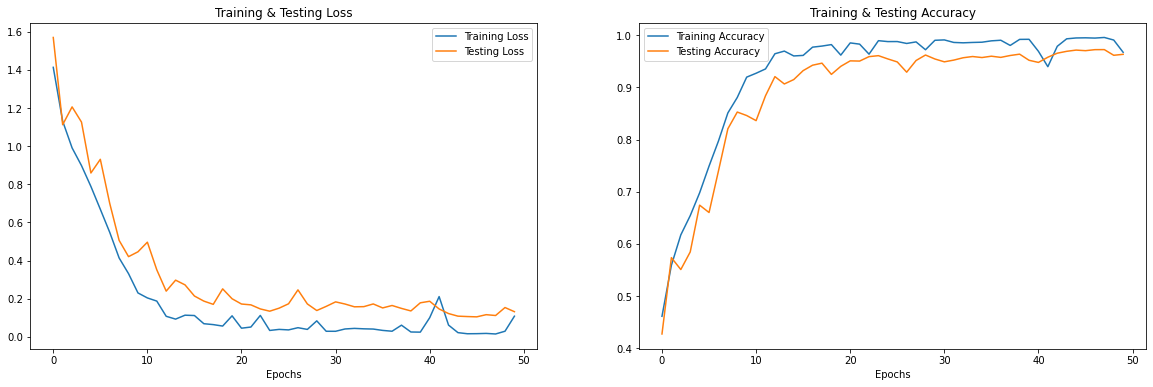

In [49]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [50]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

Predicted Labels Actual Labels
0            angry         angry
1            angry         angry
2          disgust       disgust
3            happy         happy
4             fear          fear
5            happy         happy
6            happy         happy
7             fear          fear
8             fear          fear
9         surprise      surprise

In [51]:
df0

Predicted Labels Actual Labels
0               angry         angry
1               angry         angry
2             disgust       disgust
3               happy         happy
4                fear          fear
...               ...           ...
9725             fear          fear
9726          disgust       disgust
9727          neutral       neutral
9728              sad           sad
9729             fear          fear

[9730 rows x 2 columns]

Some plots of multi_model
______________________________________________


# Evalutation

Results of best model

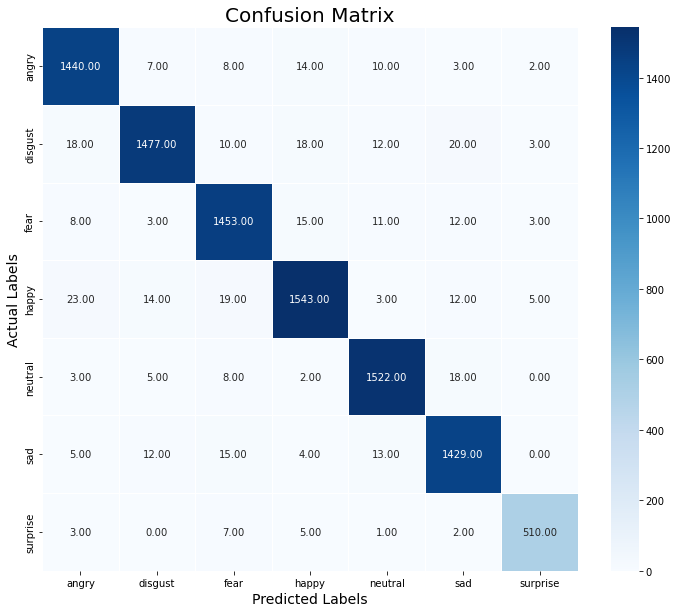

              precision    recall  f1-score   support

       angry       0.96      0.97      0.97      1484
     disgust       0.97      0.95      0.96      1558
        fear       0.96      0.97      0.96      1505
       happy       0.96      0.95      0.96      1619
     neutral       0.97      0.98      0.97      1558
         sad       0.96      0.97      0.96      1478
    surprise       0.98      0.97      0.97       528

    accuracy                           0.96      9730
   macro avg       0.96      0.96      0.96      9730
weighted avg       0.96      0.96      0.96      9730



In [58]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

# Saving Best Model

In [59]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.h5")
print("Saved model to disk") 

Saved model to disk


In [60]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [61]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

305/305 [==============================] - 8s 24ms/step - loss: 0.1117 - accuracy: 0.9725
accuracy: 97.25%
